## Pytorch ( facebook)

### 1) Tensor
* 다차원 배열

In [41]:
import numpy as np
import torch

# 학습시킬때는 tensor로 사용 ( cpu, gpu 사용 )
# predict할때는 다시 numpy 

li = np.array([[1, 2], [3, 4]])

#넘파이배열을 텐서로 변환

tensor1 = torch.tensor(li)

tensor2 = torch.as_tensor(li)

tensor3 = torch.from_numpy(li)

print(tensor1)

print(tensor2)

print(tensor3)


tensor([[1, 2],
        [3, 4]], dtype=torch.int32)
tensor([[1, 2],
        [3, 4]], dtype=torch.int32)
tensor([[1, 2],
        [3, 4]], dtype=torch.int32)


In [42]:
##############################

#텐서를 넘파이배열로 변환

print(tensor1.numpy())

print(tensor2.numpy())

print(tensor3.numpy())

[[1 2]
 [3 4]]
[[1 2]
 [3 4]]
[[1 2]
 [3 4]]


In [43]:
##############################
# torch 난수 생성

torch.manual_seed(0) #랜덤시드 고정

a = torch.rand(5) # 0 ~ 1 사이의 5개의 난수

b = torch.randn(5) # 평균 0, 표준편차 1인 5개의 난수

c = torch.randint(10, size=(5,)) # 0~9 사이의 5개의 난수

print(a)

print(b)

print(c)


tensor([0.4963, 0.7682, 0.0885, 0.1320, 0.3074])
tensor([ 0.5507,  0.2704,  0.6472,  0.2490, -0.3354])
tensor([8, 4, 3, 6, 9])


In [44]:
##############################

print(torch.arange(1, 10)) # 1~9

print(torch.ones((2, 5))) # 2행 5열, 1로 채움

print(torch.zeros((3, 5))) #3행 5열, 0으로 채움

print(torch.linspace(0, 10, 5)) # 0~10, 5등분

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])
tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])
tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
tensor([ 0.0000,  2.5000,  5.0000,  7.5000, 10.0000])


In [45]:
##############################

#텐서의 형상 변환(reshape)

t1 = torch.ones(4, 3)

t2 = t1.view(3, 4) #3행 4열로 변환

t3 = t1.view(12) #1차원 배열로 변환

print(t1)

print(t2)

print(t3)


tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])


In [46]:
##############################

t1.view(1, 3, 4) #3차원으로 변환

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

### 2) iris 데이터셋

In [47]:
from sklearn.datasets import load_iris

# iris 데이터셋 로딩

X, y = load_iris(return_X_y=True)

print(X[:5])

print(y[:5])


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


In [48]:
##############################

from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split( X, y, random_state=10, test_size=0.2, stratify=y, shuffle=True )

print(len(X_train))    
print(type(X_train))
print(X_train.shape)


120
<class 'numpy.ndarray'>
(120, 4)


In [49]:
##############################

from torch import nn

import torch.nn.functional as F

#신경망 모형

class Model(nn.Module):

    def __init__(self, input_dim):

        super(Model, self).__init__()

        #input layer, Linear 선형함수(1차함수)

        #input nodes, output nodes 50

        self.layer1 = nn.Linear(input_dim,50) 

        self.layer2 = nn.Linear(50, 20)

        self.layer3 = nn.Linear(20, 3)

        
    def forward(self, x):

        x = F.relu(self.layer1(x))

        x = F.relu(self.layer2(x))

        # 출력층의 활성화함수 - 소프트맥스

        x = F.softmax(self.layer3(x), dim=0)

        return x

In [50]:
##############################

import torch

model = Model(X_train.shape[1]) # 초기화함수의 input_dim으로 변수개수가 전달됨

optimizer = torch.optim.Adam(model.parameters(), lr=0.01) # 최적화함수 정의

loss_fn = nn.CrossEntropyLoss() #손실함수 정의

epochs = 100

In [51]:
##############################

from torch.autograd import Variable

#넘파이배열로부터 텐서를 만들고
X_train = Variable(torch.from_numpy(np.array(X_train))).float()  # 메모리 => cpu,gpu
y_train = Variable(torch.from_numpy(np.array(y_train))).long()
#label = Variable(torch.from_numpy(np.array(label)).float()).to(device)

for epoch in range(1, epochs+1):

    print("Epoch",epoch)

    #예측값

    y_pred = model(X_train)

    #손실함수에 예측값과 실제값을 입력

    loss = loss_fn(y_pred, y_train)

    print('loss:',loss.item())

    

    # 경사 초기화

    optimizer.zero_grad()

    loss.backward() # 역전파

    optimizer.step() # 가중치 업데이트

Epoch 1
loss: 1.0980700254440308
Epoch 2
loss: 1.097053050994873
Epoch 3
loss: 1.096076488494873
Epoch 4
loss: 1.0948431491851807
Epoch 5
loss: 1.0936310291290283
Epoch 6
loss: 1.092368245124817
Epoch 7
loss: 1.0912740230560303
Epoch 8
loss: 1.0903372764587402
Epoch 9
loss: 1.0895863771438599
Epoch 10
loss: 1.0889297723770142
Epoch 11
loss: 1.0883090496063232
Epoch 12
loss: 1.0878071784973145
Epoch 13
loss: 1.087348461151123
Epoch 14
loss: 1.086920142173767
Epoch 15
loss: 1.0865323543548584
Epoch 16
loss: 1.086174488067627
Epoch 17
loss: 1.0858628749847412
Epoch 18
loss: 1.0855845212936401
Epoch 19
loss: 1.0854016542434692
Epoch 20
loss: 1.085187315940857
Epoch 21
loss: 1.0849668979644775
Epoch 22
loss: 1.0847266912460327
Epoch 23
loss: 1.0845065116882324
Epoch 24
loss: 1.0842607021331787
Epoch 25
loss: 1.0840308666229248
Epoch 26
loss: 1.0838323831558228
Epoch 27
loss: 1.0836454629898071
Epoch 28
loss: 1.0834791660308838
Epoch 29
loss: 1.0833290815353394
Epoch 30
loss: 1.0831936597824

In [52]:
##############################

# Prediction

X_test = Variable(torch.from_numpy(X_test)).float()

pred = model(X_test)

pred[:5]


tensor([[3.1036e-08, 4.9576e-03, 6.6222e-05],
        [1.9384e-02, 6.9058e-07, 1.6350e-10],
        [1.5941e-08, 1.9797e-03, 1.2581e-04],
        [2.5040e-09, 3.7730e-04, 5.8909e-04],
        [2.5334e-06, 3.6634e-01, 7.0266e-07]], grad_fn=<SliceBackward0>)

In [53]:
##############################

import numpy as np

np.argmax(pred.data.numpy(), axis=1)

array([1, 0, 1, 2, 1, 2, 0, 2, 2, 0, 0, 1, 2, 2, 1, 0, 0, 1, 2, 0, 2, 2,
       2, 0, 0, 1, 1, 0, 1, 1], dtype=int64)

In [54]:
##############################

from sklearn.metrics import accuracy_score

# 모형의 정확도 측정

accuracy_score(y_test, np.argmax(pred.data.numpy(), axis=1))

1.0

In [55]:
##############################

torch.save(model, "../MODL/iris-torch.h5")

In [57]:
##############################

model2 = torch.load("../MODL/iris-torch.h5")

np.argmax(model2(X_test[0]).data.numpy())
#np.argmax(model2(Variable(torch.from_numpy(X_test[0])).float()).data.numpy())

2

In [ ]:
#!pip install torchinfo

In [58]:
##############################

#pip install torchinfo

from torchinfo import summary

summary(model)

# input_size=(batch size, input nodes)

summary(model, input_size=(32, 4)) # 미니배치

Layer (type:depth-idx)                   Output Shape              Param #
Model                                    [32, 3]                   --
├─Linear: 1-1                            [32, 50]                  250
├─Linear: 1-2                            [32, 20]                  1,020
├─Linear: 1-3                            [32, 3]                   63
Total params: 1,333
Trainable params: 1,333
Non-trainable params: 0
Total mult-adds (M): 0.04
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 0.01
Estimated Total Size (MB): 0.02

### 3) gpu 사용법
* tensorflow 처럼 cuda 버전 맞춰서 torch 설치하기

In [ ]:
#!C:\Users\tjoeun\AppData\Local\Programs\Python\Python39\Scripts\pip install torch==2.0.0+cu117 torchvision==0.15.1+cu117 torchaudio==2.0.1 --index-url https://download.pytorch.org/whl/cu117 --user

In [1]:
import torch

#gpu 사용 가능 여부

print(torch.cuda.is_available())

#  True

#gpu 장치의 인덱스

print(torch.cuda.current_device())

#  0

# 사용가능한 gpu 장치수

print(torch.cuda.device_count())

#  1

#  gpu의 이름

print(torch.cuda.get_device_name(0))




True
0
1
NVIDIA GeForce GTX 1050


In [2]:
##############################

import torch

# Default CUDA device

cuda = torch.device('cuda')

# 텐서 자료를 gpu에 저장 방법 3가지

a = torch.tensor([1, 2], device=cuda)

b = torch.tensor([1, 2]).cuda()

c = torch.tensor([1, 2]).to(device=cuda)

print(a)

print(b)

print(c)


tensor([1, 2], device='cuda:0')
tensor([1, 2], device='cuda:0')
tensor([1, 2], device='cuda:0')


In [3]:
##############################

#사용하지 않는 텐서 정리

torch.cuda.empty_cache()

### 4) wine 데이터셋

In [5]:
from sklearn.datasets import load_wine

wine = load_wine()

##############################

import pandas as pd

pd.DataFrame(wine.data, columns=wine.feature_names)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [6]:


##############################

wine.target

##############################

#독립변수

X = wine.data

#종속변수

y = wine.target




In [7]:
##############################

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

##############################

import torch

# 학습용 데이터를 텐서로 변환

X_train = torch.from_numpy(X_train).float()

y_train = torch.from_numpy(y_train).long()

# 검증용 데이터를 텐서로 변환

X_test = torch.from_numpy(X_test).float()

y_test = torch.from_numpy(y_test).long()

##############################

#텐서를 gpu로 옮기고

X_train=X_train.cuda()

y_train=y_train.cuda()

X_test=X_test.cuda()

y_test=y_test.cuda()

In [8]:
##############################

from torch.utils.data import DataLoader, TensorDataset

# 독립변수와 종속변수의 텐서를 합침

train = TensorDataset(X_train, y_train)

print(train[0])

# 미니배치로 분할

train_loader = DataLoader(train, batch_size=16, shuffle=True)

(tensor([1.3480e+01, 1.6700e+00, 2.6400e+00, 2.2500e+01, 8.9000e+01, 2.6000e+00,
        1.1000e+00, 5.2000e-01, 2.2900e+00, 1.1750e+01, 5.7000e-01, 1.7800e+00,
        6.2000e+02], device='cuda:0'), tensor(2, device='cuda:0'))


In [9]:
##############################

import torch.nn as nn

import torch.nn.functional as F

# 신경망 구성

class Net(nn.Module):

    def __init__(self):

        super(Net, self).__init__()

        self.fc1 = nn.Linear(13, 96) # input 13, output 96

        self.fc2 = nn.Linear(96, 72)

        self.fc3 = nn.Linear(72, 64)

        self.fc4 = nn.Linear(64, 32)

        self.fc5 = nn.Linear(32, 16)

        self.fc6 = nn.Linear(16, 3)



    def forward(self, x):

        x = F.relu(self.fc1(x))

        x = F.relu(self.fc2(x))

        x = F.relu(self.fc3(x))

        x = F.relu(self.fc4(x))

        x = F.relu(self.fc5(x))

        x = self.fc6(x)

        # softmax 함수의 결과값에 log 적용

        # dim=0 행방향, 1 열방향

        # dim=0, row에서 최대값을 구하는 방식

        return F.log_softmax(x, dim=0)

# 인스턴스 생성

model = Net().cuda()

In [11]:
##############################

import torch.optim as optim

from torch.autograd import Variable



# 손실함수 객체

criterion = nn.CrossEntropyLoss()

# 최적화함수

optimizer = optim.SGD(model.parameters(), lr=0.001)

# 학습 시작

for epoch in range(500):

    total_loss = 0

    for train_x, train_y in train_loader:

        # 계산 그래프 구성

        train_x, train_y = Variable(train_x), Variable(train_y)

        #텐서를 gpu로 이동시킴

        train_x=train_x.cuda()

        train_y=train_y.cuda()        

        # 경사 초기화

        optimizer.zero_grad()

        # 순전파 계산

        output = model(train_x)

        # 오차계산

        loss = criterion(output, train_y)

        # 역전파 계산

        loss.backward()

        # 가중치 업데이트

        optimizer.step()

        # 누적 오차 계산

        total_loss += loss.data

    # 50회 반복마다 누적오차 출력

    if (epoch+1) % 50 == 0:

        print(epoch+1, total_loss)

50 tensor(5.8417, device='cuda:0')
100 tensor(6.2587, device='cuda:0')
150 tensor(5.6116, device='cuda:0')
200 tensor(5.8158, device='cuda:0')
250 tensor(5.6393, device='cuda:0')
300 tensor(5.5924, device='cuda:0')
350 tensor(5.5390, device='cuda:0')
400 tensor(5.7564, device='cuda:0')
450 tensor(5.7482, device='cuda:0')
500 tensor(5.7077, device='cuda:0')


In [12]:
##############################

# 계산 그래프 구성

X_test, y_test = Variable(X_test), Variable(y_test)

# 출력값 계산

result = torch.max(model(X_test).data, 1)[1]

# 모형의 정확도 측정

# gpu에 저장된 텐서를 cpu로 이동시킴

y_test=y_test.cpu()

result=result.cpu()

accuracy = sum(y_test.data.numpy() == result.numpy()) / len(y_test.data.numpy())

# 모형의 정확도 출력

accuracy

0.6388888888888888

### 5) mnist 데이터셋

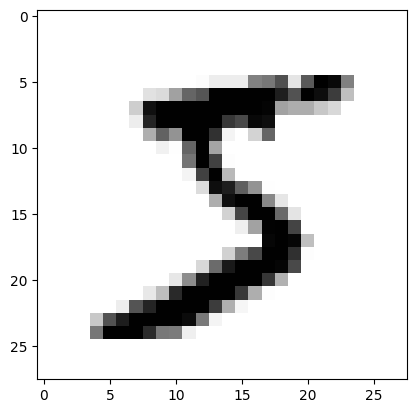

torch.Size([60000, 784])
torch.Size([60000])
10 tensor(297.1051, device='cuda:0')
20 tensor(79.6446, device='cuda:0')
30 tensor(35.6095, device='cuda:0')
40 tensor(17.4472, device='cuda:0')
50 tensor(8.4787, device='cuda:0')
60 tensor(3.5049, device='cuda:0')
70 tensor(2.0258, device='cuda:0')
80 tensor(1.5283, device='cuda:0')
90 tensor(0.9067, device='cuda:0')
100 tensor(0.7611, device='cuda:0')
tensor([7, 2, 1, 0, 4])
[7 2 1 0 4]
Net(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=256, bias=True)
  (fc4): Linear(in_features=256, out_features=128, bias=True)
  (fc5): Linear(in_features=128, out_features=128, bias=True)
  (fc6): Linear(in_features=128, out_features=10, bias=True)
)


Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [100, 10]                 --
├─Linear: 1-1                            [100, 256]                200,960
├─Linear: 1-2                            [100, 256]                65,792
├─Linear: 1-3                            [100, 256]                65,792
├─Linear: 1-4                            [100, 128]                32,896
├─Linear: 1-5                            [100, 128]                16,512
├─Linear: 1-6                            [100, 10]                 1,290
Total params: 383,242
Trainable params: 383,242
Non-trainable params: 0
Total mult-adds (M): 38.32
Input size (MB): 0.31
Forward/backward pass size (MB): 0.83
Params size (MB): 1.53
Estimated Total Size (MB): 2.67

In [13]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

##############################

X_train= X_train.reshape(-1,784)

X_test= X_test.reshape(-1,784)

X_train=X_train/255.

X_test=X_test/255.

##############################

import matplotlib.pyplot as plt

from matplotlib import cm

plt.imshow(X_train[0].reshape(28,28),cmap=cm.gray_r)

plt.show()

##############################

import torch

# 학습용 데이터 텐서 변환

# from_numpy() 넘파이배열을 텐서로 변환

X_train = torch.from_numpy(X_train).float()

y_train = torch.from_numpy(y_train.astype('int32')).long()

# 검증용 데이터 텐서 변환

X_test = torch.from_numpy(X_test).float()

y_test = torch.from_numpy(y_test.astype('int32')).long()

# 변환된 텐서의 샘플수 확인

print(X_train.shape)

print(y_train.shape)

##############################

X_train=X_train.cuda()

y_train=y_train.cuda()

X_test=X_test.cuda()

y_test=y_test.cuda()

##############################

from torch.utils.data import DataLoader, TensorDataset

# 독립변수와 종속변수 텐서를 합침

train = TensorDataset(X_train, y_train)

# 미니배치 분할

train_loader = DataLoader(train, batch_size=100, shuffle=True)

##############################

import torch.nn as nn

class Net(nn.Module):

    def __init__(self):

        super(Net, self).__init__()

        self.fc1 = nn.Linear(784, 256)

        self.fc2 = nn.Linear(256, 256)

        self.fc3 = nn.Linear(256, 256)

        self.fc4 = nn.Linear(256, 128)

        self.fc5 = nn.Linear(128, 128)

        self.fc6 = nn.Linear(128, 10)

    def forward(self, x):

        x = F.relu(self.fc1(x))

        x = F.relu(self.fc2(x))

        x = F.relu(self.fc3(x))

        x = F.relu(self.fc4(x))

        x = F.relu(self.fc5(x))

        x = self.fc6(x)

        return F.log_softmax(x,dim=0)

model = Net().cuda()

##############################

from torch.autograd import Variable

import torch.nn.functional as F

import torch.optim as optim

# 손실함수

criterion = nn.CrossEntropyLoss()

# 최적화함수

optimizer = optim.SGD(model.parameters(), lr=0.01)

for epoch in range(100):

    total_loss = 0

    for X_train, y_train in train_loader:

        # 계산 그래프 구성

        X_train, y_train = Variable(X_train), Variable(y_train)

        X_train=X_train.cuda()

        y_train=y_train.cuda()  

        # 경사 초기화

        optimizer.zero_grad()

        # 순전파 계산

        output = model(X_train)

        # 오차계산

        loss = criterion(output, y_train)

        # 역전파 계산

        loss.backward()

        # 가중치 업데이트

        optimizer.step()

        # 누적 오차 계산

        total_loss += loss.data

    # 10회 반복마다 누적오차 출력

    if (epoch+1) % 10 == 0:

        print(epoch+1, total_loss)

##############################

# 계산 그래프 구성

X_test, y_test = Variable(X_test), Variable(y_test)

result = torch.max(model(X_test).data, 1)[1]

y_test=y_test.cpu()

result=result.cpu()

print(result[:5]) # 출력값

print(y_test.data.numpy()[:5]) #실제값

# 모형의 정확도 측정

accuracy = sum(y_test.data.numpy() == result.numpy()) / len(y_test.data.numpy())

# 모형의 정확도 출력

accuracy

##############################

print(model)

##############################

from torchinfo import summary

batch_size=100

# batch_size, input nodes

summary(model, input_size=(batch_size, 784))

### 6) mnist 데이터셋(CNN)

In [16]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape, y_train.shape)
##############################

# 샘플수, 채널(흑백1/컬러3), 가로, 세로

X_train= X_train.reshape(-1,1,28,28)

X_test= X_test.reshape(-1,1,28,28)

X_train=X_train/255.

X_test=X_test/255.



(60000, 28, 28) (60000,)


In [17]:
##############################

import torch

# 넘파이배열을 텐서로 이동

X_train=torch.from_numpy(X_train).float()

y_train=torch.from_numpy(y_train.astype('int32')).long()

X_test=torch.from_numpy(X_test).float()

y_test=torch.from_numpy(y_test.astype('int32')).long()

print(X_train.shape)

print(X_test.shape)

##############################

#텐서를 gpu로 옮기고

X_train=X_train.cuda()

y_train=y_train.cuda()

X_test=X_test.cuda()

y_test=y_test.cuda()

torch.Size([60000, 1, 28, 28])
torch.Size([10000, 1, 28, 28])


In [18]:
##############################

from torch.utils.data import DataLoader, TensorDataset

# 독립변수와 종속변수 텐서를 합침

train = TensorDataset(X_train, y_train)

#print(train[0])

# 미니배치 분할

train_loader = DataLoader(train, batch_size=100, shuffle=True)

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

In [26]:
##############################

import torch.nn as nn

import torch.nn.functional as F

# 신경망 구성

class Net(nn.Module):

    def __init__(self):

        super(Net, self).__init__()

        # input shape: 60000, 1, 28, 28
        self.conv1 = nn.Conv2d(1, 6, 5) # 입력 채널 수(흑백1,컬러3), 출력 채널 수, 필터 크기
        # 6 * ((28-5)/1)+1) * ((28-5)/1)+1) = 6*24*24

        # max_pool(2) --> 6*12*12

        # input shape: 6*12*12
        self.conv2 = nn.Conv2d(6, 16, 5)
        # 16 * ((12-5)/1)+1) * ((12-5)/1)+1) = 16*8*8

        # max_pool(2) --> 16*4*4

        # input shape: 16*4*4
        # Fully Connected Layer
        self.fc1 = nn.Linear(256, 64)
        self.fc2 = nn.Linear(64, 10)

    

    def forward(self, x):

        x = F.max_pool2d(F.relu(self.conv1(x)), 2) # 풀링 영역 크기

        x = F.max_pool2d(F.relu(self.conv2(x)), 2)

        x = x.view(-1, 256)

        x = F.relu(self.fc1(x))

        x = self.fc2(x)

        return F.log_softmax(x, dim=0)

    

# 인스턴스 생성

model = Net().cuda()

In [27]:
##############################

import torch.optim as optim

from torch.autograd import Variable

criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(model.parameters(), lr=0.01)

for epoch in range(300):

    total_loss = 0

    for X_train, y_train in train_loader:

        X_train, y_train = Variable(X_train), Variable(y_train)     # 계산 그래프 구성

        #텐서를 gpu로 이동시킴

        X_train=X_train.cuda()

        y_train=y_train.cuda()

        # 경사 초기화

        optimizer.zero_grad()

        # 순전파 계산

        output = model(X_train)

        # 오차계산

        loss = criterion(output, y_train)

        # 역전파 계산

        loss.backward()

        # 가중치 업데이트

        optimizer.step()

        # 누적 오차 계산

        total_loss += loss.data

    # 50회 반복마다 누적 오차 출력

    if (epoch+1) % 50 == 0:

        print(epoch+1, total_loss)

50 tensor(19.2938, device='cuda:0')
100 tensor(10.2149, device='cuda:0')
150 tensor(6.3706, device='cuda:0')
200 tensor(3.9375, device='cuda:0')
250 tensor(2.4561, device='cuda:0')
300 tensor(1.3874, device='cuda:0')


In [ ]:
##############################

X_test, y_test = Variable(X_test), Variable(y_test)

# [0] values, [1] indices

# 모형이 분류한 값들(10개) 중 가장 큰 값과 인덱스

# 출력이 0 또는 1이 되게 함

result = torch.max(model(X_test).data, 1)[1]

#print(result)

# 모형의 정확도 측정

# gpu에 저장된 텐서를 cpu로 이동시킴

y_test=y_test.cpu()

result=result.cpu()

accuracy = sum(y_test.data.numpy() == result.numpy()) / len(y_test.data.numpy())

accuracy

##############################

print(model)

In [ ]:
##############################

from torchinfo import summary

batch_size=100

# batch_size, channels, height, width

summary(model, input_size=(batch_size, 1, 28, 28))

### 8) mnist 데이터셋(skorch)

In [37]:
# skorch : pytorch를 쉽게 구현할 수 있는 라이브러리

from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape, y_train.shape)

##############################

X_train= X_train.reshape(-1,784)

X_test= X_test.reshape(-1,784)

X_train=X_train/255.

X_test=X_test/255.

print(X_train.shape)
print(type(X_train))
print(X_train)


(60000, 28, 28) (60000,)
(60000, 784)
<class 'numpy.ndarray'>
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [5]:
#!C:\Users\tjoeun\AppData\Local\Programs\Python\Python39\Scripts\pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
  Using cached https://download.pytorch.org/whl/cu118/torchvision-0.15.2%2Bcu118-cp39-cp39-win_amd64.whl (4.9 MB)
  Using cached https://download.pytorch.org/whl/cu118/torchaudio-2.0.2%2Bcu118-cp39-cp39-win_amd64.whl (2.5 MB)


In [39]:
##############################

import torch

X_train=torch.from_numpy(X_train).float()

y_train=torch.from_numpy(y_train.astype('int32')).long()

X_test=torch.from_numpy(X_test).float()

y_test=torch.from_numpy(y_test.astype('int32')).long()

print(X_train.shape)

print(X_test.shape)

X_train=X_train.cuda()

y_train=y_train.cuda()

X_test=X_test.cuda()

torch.Size([60000, 784])
torch.Size([10000, 784])


AssertionError: Torch not compiled with CUDA enabled

In [ ]:
##############################

import torch.nn as nn

import torch.nn.functional as F

# 신경망 구성

class Net(nn.Module):

    def __init__(self):

        super(Net, self).__init__()


        self.fc1 = nn.Linear(784, 128)

        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):

        x = F.relu(self.fc1(x))

        x = self.fc2(x)

        return F.softmax(x, dim=-1)

model=Net().cuda()

In [8]:
!C:\Users\tjoeun\AppData\Local\Programs\Python\Python39\Scripts\pip install skorch

  Obtaining dependency information for skorch from https://files.pythonhosted.org/packages/b7/fa/55cad8c7cb104fe04341945a05e21da3b04c0a0fc0b3644ee2175b8ad8b8/skorch-0.14.0-py3-none-any.whl.metadata
  Obtaining dependency information for tqdm>=4.14.0 from https://files.pythonhosted.org/packages/00/e5/f12a80907d0884e6dff9c16d0c0114d81b8cd07dc3ae54c5e962cc83037e/tqdm-4.66.1-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 57.6/57.6 kB ? eta 0:00:00
   ---------------------------------------- 0.0/221.3 kB ? eta -:--:--
   ---------------------------------------- 221.3/221.3 kB ? eta 0:00:00
   ---------------------------------------- 0.0/78.3 kB ? eta -:--:--
   ---------------------------------------- 78.3/78.3 kB ? eta 0:00:00


In [ ]:
##############################

# pip install skorch

from skorch import NeuralNetClassifier

net = NeuralNetClassifier(Net,max_epochs=20,lr=0.1)

net.fit(X_train, y_train)

In [ ]:
##############################

import numpy as np

# 모형의 정확도 계산

pred = net.predict(X_test)

y_test = y_test.cpu().numpy()

accuracy = np.mean(pred == y_test)

accuracy

In [ ]:
##############################

from torchinfo import summary

summary(model, input_size=(100,784))

### 9) 단순회귀분석(random data)

In [9]:
import torch

import os    

os.environ['KMP_DUPLICATE_LIB_OK']='True' # matplot 커널 겹침에러 방지

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

################################

a=torch.linspace(-1, 1, 10)

print(a)

print(a.shape)

tensor([-1.0000, -0.7778, -0.5556, -0.3333, -0.1111,  0.1111,  0.3333,  0.5556,
         0.7778,  1.0000])
torch.Size([10])


In [13]:
torch.cuda.is_available()

False

In [10]:
################################

# squeeze 차원축소
# un squeeze 차원증가

# size가 1인 dimension 추가

# dim=추가할인덱스, (0, 추가할 인덱스)

b=torch.unsqueeze(torch.linspace(-1, 1, 10), dim=1)

print(b)

print(b.shape)

tensor([[-1.0000],
        [-0.7778],
        [-0.5556],
        [-0.3333],
        [-0.1111],
        [ 0.1111],
        [ 0.3333],
        [ 0.5556],
        [ 0.7778],
        [ 1.0000]])
torch.Size([10, 1])


In [11]:
################################

# size가 1인 dimension 제거

# dim=추가할인덱스, (0, 추가할 인덱스)

print(b.shape)

print(torch.squeeze(b))

print(torch.squeeze(b).shape)

torch.Size([10, 1])
tensor([-1.0000, -0.7778, -0.5556, -0.3333, -0.1111,  0.1111,  0.3333,  0.5556,
         0.7778,  1.0000])
torch.Size([10])


torch.Size([100, 1])
torch.Size([100, 1])


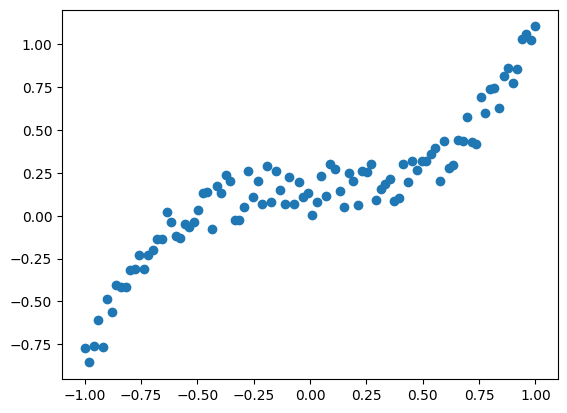

In [12]:
################################

import random

from matplotlib import pyplot as plt

random.seed(1)

torch.manual_seed(1)

X = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1).to(device)

y = X.pow(3) + 0.3 * torch.rand(X.size()).to(device)

print(X.shape)

print(y.shape)

plt.scatter(X.cpu().numpy(), y.cpu().numpy()) # 학습외에는 RAM에서 작업

In [14]:
################################

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

################################

from torch import nn

learning_rate = 1e-3

model = nn.Sequential(

    nn.Linear(1, 100),

    nn.Linear(100, 10),

    nn.Linear(10, 1)

)

model.to(device) # Convert to CUDA

Sequential(
  (0): Linear(in_features=1, out_features=100, bias=True)
  (1): Linear(in_features=100, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [15]:
################################

criterion = torch.nn.MSELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for t in range(1000):

    

    y_pred = model(X_train)

    

    loss = criterion(y_pred, y_train)

    print(f"epoch: {t}, loss: {loss:.3f}")

    optimizer.zero_grad()

    

    loss.backward()

    

    optimizer.step()

epoch: 0, loss: 0.156
epoch: 1, loss: 0.152
epoch: 2, loss: 0.148
epoch: 3, loss: 0.145
epoch: 4, loss: 0.141
epoch: 5, loss: 0.138
epoch: 6, loss: 0.135
epoch: 7, loss: 0.131
epoch: 8, loss: 0.128
epoch: 9, loss: 0.126
epoch: 10, loss: 0.123
epoch: 11, loss: 0.120
epoch: 12, loss: 0.117
epoch: 13, loss: 0.115
epoch: 14, loss: 0.112
epoch: 15, loss: 0.110
epoch: 16, loss: 0.108
epoch: 17, loss: 0.105
epoch: 18, loss: 0.103
epoch: 19, loss: 0.101
epoch: 20, loss: 0.099
epoch: 21, loss: 0.097
epoch: 22, loss: 0.095
epoch: 23, loss: 0.094
epoch: 24, loss: 0.092
epoch: 25, loss: 0.090
epoch: 26, loss: 0.089
epoch: 27, loss: 0.087
epoch: 28, loss: 0.086
epoch: 29, loss: 0.084
epoch: 30, loss: 0.083
epoch: 31, loss: 0.081
epoch: 32, loss: 0.080
epoch: 33, loss: 0.079
epoch: 34, loss: 0.077
epoch: 35, loss: 0.076
epoch: 36, loss: 0.075
epoch: 37, loss: 0.074
epoch: 38, loss: 0.073
epoch: 39, loss: 0.072
epoch: 40, loss: 0.071
epoch: 41, loss: 0.070
epoch: 42, loss: 0.069
epoch: 43, loss: 0.06

In [18]:
################################

learning_rate = 1e-3

n_networks = 9

models = list()

criterion = torch.nn.MSELoss()


# 2번째 레이어에 비선형 활성호함수 도입 실험
for i in range(n_networks):

    model = nn.Sequential(

        nn.Linear(1, 100),

        nn.ReLU() if i % 3 == 0 else nn.Tanh() if i % 3==1 else nn.Sigmoid(),

        nn.Linear(100, 1)

    )

    model.to(device)
    
    models.append(model)

    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    

    for t in range(1000):

        y_pred = model(X_train)

        loss = criterion(y_pred, y_train)
    
        print(f"model: {i + 1}, epoch: {t}, loss: {loss.item():.3f}")

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

model: 1, epoch: 0, loss: 0.177
model: 1, epoch: 1, loss: 0.160
model: 1, epoch: 2, loss: 0.144
model: 1, epoch: 3, loss: 0.129
model: 1, epoch: 4, loss: 0.116
model: 1, epoch: 5, loss: 0.103
model: 1, epoch: 6, loss: 0.092
model: 1, epoch: 7, loss: 0.082
model: 1, epoch: 8, loss: 0.073
model: 1, epoch: 9, loss: 0.066
model: 1, epoch: 10, loss: 0.059
model: 1, epoch: 11, loss: 0.053
model: 1, epoch: 12, loss: 0.048
model: 1, epoch: 13, loss: 0.044
model: 1, epoch: 14, loss: 0.040
model: 1, epoch: 15, loss: 0.037
model: 1, epoch: 16, loss: 0.035
model: 1, epoch: 17, loss: 0.033
model: 1, epoch: 18, loss: 0.032
model: 1, epoch: 19, loss: 0.030
model: 1, epoch: 20, loss: 0.030
model: 1, epoch: 21, loss: 0.029
model: 1, epoch: 22, loss: 0.028
model: 1, epoch: 23, loss: 0.028
model: 1, epoch: 24, loss: 0.028
model: 1, epoch: 25, loss: 0.028
model: 1, epoch: 26, loss: 0.027
model: 1, epoch: 27, loss: 0.027
model: 1, epoch: 28, loss: 0.028
model: 1, epoch: 29, loss: 0.028
model: 1, epoch: 30,

In [19]:
################################

from torch.autograd import Variable

acc=[]

for model in models:

    X_test, y_test = Variable(X_test), Variable(y_test)

    mse = ((torch.pow((model(X_test).data.cpu() - y_test.cpu()), 2)).sum()) / len(y_test.cpu())

    acc.append(mse)

    print(mse)

tensor(0.0076)
tensor(0.0148)
tensor(0.0418)
tensor(0.0077)
tensor(0.0091)
tensor(0.0424)
tensor(0.0072)
tensor(0.0116)
tensor(0.0423)


In [20]:
################################

import numpy as np

model=models[np.argmin(acc)]

print(model)

print(np.argmin(acc))

print(acc[np.argmin(acc)])

Sequential(
  (0): Linear(in_features=1, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=1, bias=True)
)
6
tensor(0.0072)


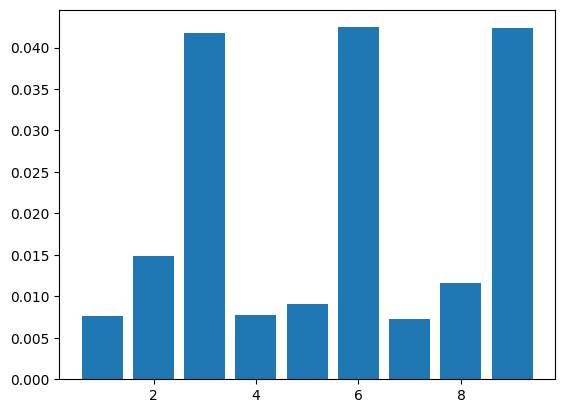

In [21]:
################################

plt.bar(range(1,10),acc)

plt.show()


In [23]:
!C:\Users\tjoeun\AppData\Local\Programs\Python\Python39\Scripts\pip install torchinfo

  Obtaining dependency information for torchinfo from https://files.pythonhosted.org/packages/72/25/973bd6128381951b23cdcd8a9870c6dcfc5606cb864df8eabd82e529f9c1/torchinfo-1.8.0-py3-none-any.whl.metadata
  Using cached torchinfo-1.8.0-py3-none-any.whl.metadata (21 kB)
Using cached torchinfo-1.8.0-py3-none-any.whl (23 kB)


In [24]:
################################

from torchinfo import summary

summary(model)

summary(model, input_size=(32, 1))

Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [32, 1]                   --
├─Linear: 1-1                            [32, 100]                 200
├─ReLU: 1-2                              [32, 100]                 --
├─Linear: 1-3                            [32, 1]                   101
Total params: 301
Trainable params: 301
Non-trainable params: 0
Total mult-adds (M): 0.01
Input size (MB): 0.00
Forward/backward pass size (MB): 0.03
Params size (MB): 0.00
Estimated Total Size (MB): 0.03

In [26]:
!C:\Users\tjoeun\AppData\Local\Programs\Python\Python39\Scripts\pip install torchviz

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/47.0 kB ? eta -:--:--
     ---------------------------------------- 47.0/47.0 kB 2.5 MB/s eta 0:00:00
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4157 sha256=71497f23c0fb1bc385eed448a03fb5b1b373b42940df2d1b8cc11560475445fd
  Stored in directory: c:\users\tjoeun\appdata\local\pip\cache\wheels\29\65\6e\db2515eb1dc760fecd36b40d54df65c1e18534013f1c037e2e
Successfully built torchviz


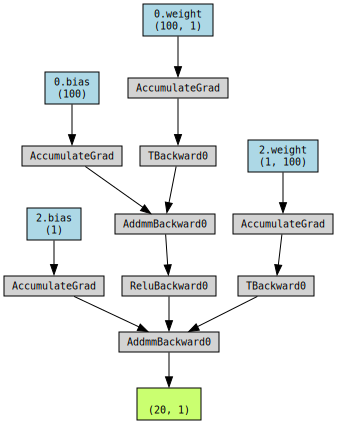

In [27]:
################################

from torchviz import make_dot

pred=model(X_test)

make_dot(pred, params=dict(model.named_parameters()))

In [29]:
!C:\Users\tjoeun\AppData\Local\Programs\Python\Python39\Scripts\pip install torchview


(dot.exe:2452): Pango-WARNING **: couldn't load font "Linux libertine Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.


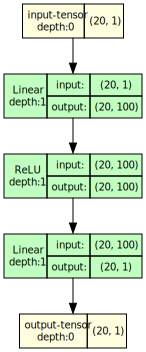

In [30]:
################################

from torchview import draw_graph

model_graph = draw_graph(model, input_data=X_test)

model_graph.visual_graph

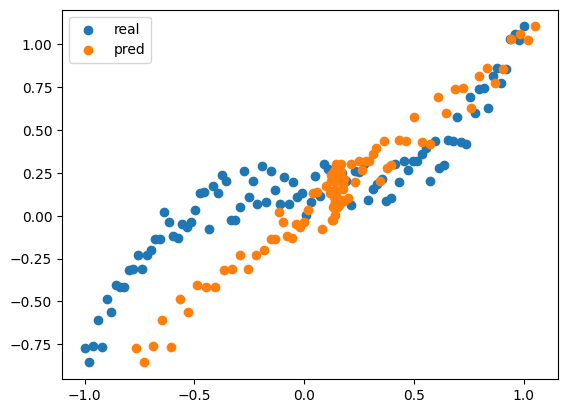

In [31]:
################################

plt.scatter(X.cpu().numpy(), y.cpu().numpy(), label='real')

plt.scatter(model(X).cpu().detach().numpy(), y.cpu().numpy(), label='pred')

plt.legend()

plt.show()

### 10) 단순회귀분석(csv)

In [19]:
import pandas as pd

df = pd.read_csv('../DATA/regression_test.csv')

df


,x,y
0,1,1.619379
1,2,1.857290
2,3,2.628194
3,4,2.725426
4,5,3.498926
5,6,3.867042
6,7,4.934539
7,8,4.864829
8,9,5.241539
9,10,5.823689


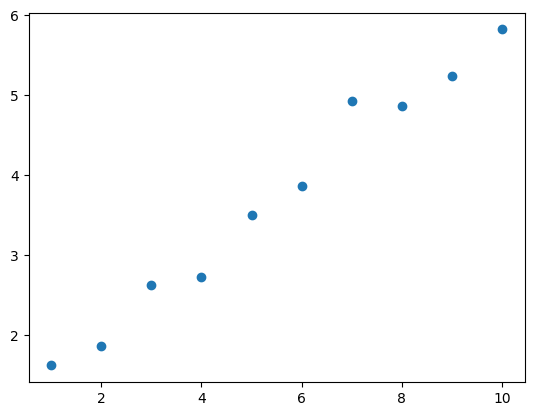

In [20]:
################################

import torch

X = torch.from_numpy(df['x'].values).unsqueeze(1).float()

y = torch.from_numpy(df['y'].values).unsqueeze(1).float()

################################

import matplotlib.pyplot as plt

import os    

os.environ['KMP_DUPLICATE_LIB_OK']='True'

plt.scatter(X, y)

plt.show()

In [21]:
################################

from torch import nn

# 단순한 신경망

model = nn.Linear(in_features=1, out_features=1, bias=True)

print(model)

# 초기 파라미터

print(model.weight)

print(model.bias)

################################

criterion = nn.MSELoss()

optimizer = torch.optim.Adam(params=model.parameters(), lr=0.01)

print(model(X)) # predict(학습 전)

Linear(in_features=1, out_features=1, bias=True)
Parameter containing:
tensor([[-0.8058]], requires_grad=True)
Parameter containing:
tensor([-0.6127], requires_grad=True)
tensor([[-1.4184],
        [-2.2242],
        [-3.0300],
        [-3.8357],
        [-4.6415],
        [-5.4473],
        [-6.2531],
        [-7.0588],
        [-7.8646],
        [-8.6704]], grad_fn=<AddmmBackward0>)


In [22]:
################################

for step in range(500):

    prediction = model(X)

    loss = criterion(input=prediction, target=y)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    print(f"epoch: {step}, loss: {loss:.3f}")

################################

print(model(X)) # predict(학습 후)

epoch: 0, loss: 90.316
epoch: 1, loss: 88.971
epoch: 2, loss: 87.636
epoch: 3, loss: 86.312
epoch: 4, loss: 84.998
epoch: 5, loss: 83.695
epoch: 6, loss: 82.404
epoch: 7, loss: 81.123
epoch: 8, loss: 79.854
epoch: 9, loss: 78.597
epoch: 10, loss: 77.351
epoch: 11, loss: 76.116
epoch: 12, loss: 74.894
epoch: 13, loss: 73.683
epoch: 14, loss: 72.485
epoch: 15, loss: 71.299
epoch: 16, loss: 70.125
epoch: 17, loss: 68.964
epoch: 18, loss: 67.814
epoch: 19, loss: 66.678
epoch: 20, loss: 65.554
epoch: 21, loss: 64.442
epoch: 22, loss: 63.343
epoch: 23, loss: 62.257
epoch: 24, loss: 61.184
epoch: 25, loss: 60.123
epoch: 26, loss: 59.075
epoch: 27, loss: 58.040
epoch: 28, loss: 57.017
epoch: 29, loss: 56.007
epoch: 30, loss: 55.010
epoch: 31, loss: 54.026
epoch: 32, loss: 53.054
epoch: 33, loss: 52.095
epoch: 34, loss: 51.148
epoch: 35, loss: 50.215
epoch: 36, loss: 49.293
epoch: 37, loss: 48.384
epoch: 38, loss: 47.488
epoch: 39, loss: 46.604
epoch: 40, loss: 45.732
epoch: 41, loss: 44.872
ep

In [23]:
################################

def mse_loss(preds, trues):  

    return torch.sum((preds - trues)**2) / preds.view(-1).shape[0]

mse_loss(model(X), y)

################################

loss.data.item(), model.weight.data.item(), model.bias.data.item()

(0.05579313635826111, 0.5222377181053162, 0.7837941646575928)

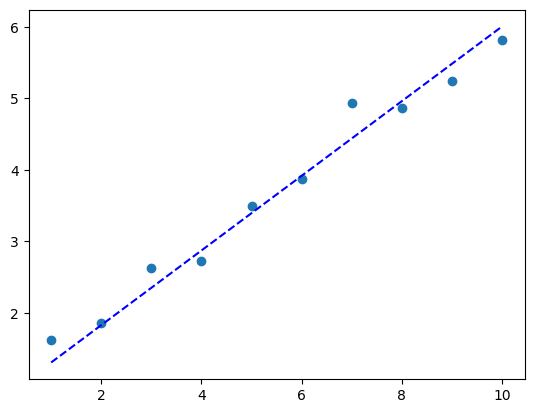

In [24]:
################################

def display_results(model, x, y):

    pred = model(x)

    plt.scatter(x.data.numpy(), y.data.numpy())

    plt.plot(x.data.numpy(), pred.data.numpy(), 'b--')

    

    plt.show()

display_results(model, X, y)

### 11) 다중회귀분석

Sequential(
  (0): Linear(in_features=3, out_features=24, bias=True)
  (1): ReLU()
  (2): Linear(in_features=24, out_features=12, bias=True)
  (3): ReLU()
  (4): Linear(in_features=12, out_features=3, bias=True)
  (5): ReLU()
  (6): Linear(in_features=3, out_features=1, bias=True)
)
Parameter containing:
tensor([[ 0.5614,  0.1684, -0.2660]], requires_grad=True)
Parameter containing:
tensor([-0.2388], requires_grad=True)
epoch 0, loss 2953.231689453125
epoch 50, loss 501.0291442871094
epoch 100, loss 374.3981628417969
epoch 150, loss 363.02069091796875
epoch 200, loss 353.9225769042969
epoch 250, loss 346.05621337890625
epoch 300, loss 339.94110107421875
epoch 350, loss 332.91314697265625
epoch 400, loss 323.9660949707031
epoch 450, loss 311.5118103027344
epoch 500, loss 301.8925476074219
epoch 550, loss 292.87591552734375
epoch 600, loss 280.0024108886719
epoch 650, loss 259.9172058105469
epoch 700, loss 245.048828125
epoch 750, loss 236.04312133789062
epoch 800, loss 230.585205078125


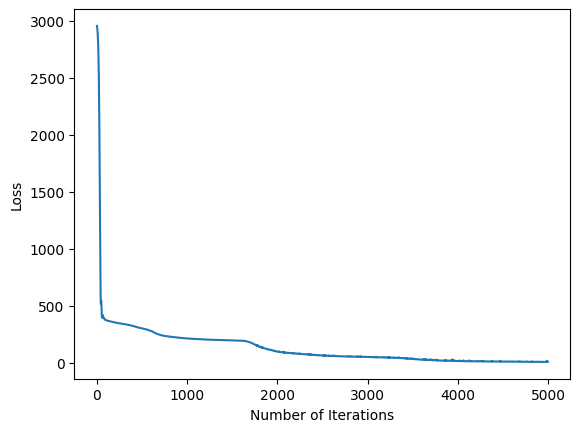

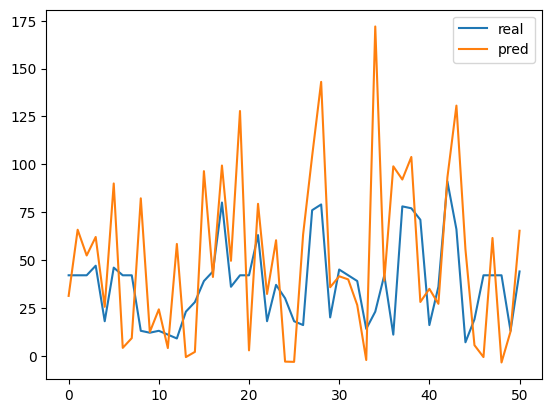

In [25]:
import pandas as pd

df = pd.read_csv("../DATA/ozone2.csv")

df.head()

################################

df.columns

################################

X = df[['Solar.R', 'Wind', 'Temp']]

y = df[["Ozone"]]

################################

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

################################

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)

X_test_scaled = sc.transform(X_test)

################################

import numpy as np

X_train = np.array(X_train_scaled,dtype=np.float32)

y_train = np.array(y_train,dtype=np.float32)

X_test = np.array(X_test_scaled,dtype=np.float32)

y_test = np.array(y_test,dtype=np.float32)

################################

import torch

inputs = torch.from_numpy(X_train)

targets = torch.from_numpy(y_train)

################################

import torch.nn as nn

input_dim = X_train.shape[1]

output_dim = 64  

model = nn.Sequential(

    nn.Linear(input_dim,24),

    nn.ReLU(),

    nn.Linear(24,12),

    nn.ReLU(),

    nn.Linear(12,3),

    nn.ReLU(),

    nn.Linear(3,1)

)

print(model)

print(model[6].weight)

print(model[6].bias)

################################

mse = nn.MSELoss()

optimizer = torch.optim.Adam(model.parameters(),lr = 0.01)

loss_list = []

iteration_number = 5000

for iteration in range(iteration_number):

    optimizer.zero_grad()

    results = model(inputs)

    

    loss = mse(results, targets)

    loss.backward()

    optimizer.step()

    loss_list.append(loss.data)

    if(iteration % 50 == 0):

        print('epoch {}, loss {}'.format(iteration, loss.data))

################################

import matplotlib.pyplot as plt

plt.plot(range(iteration_number),loss_list)

plt.xlabel("Number of Iterations")

plt.ylabel("Loss")

plt.show()

################################

input_x_test = torch.from_numpy(X_test)

predicted = model(input_x_test.float()).data.numpy()

predicted[0:5]

################################

loss.data.item() # mse

################################

np.sqrt(loss.data.item()) # rmse

################################

X_test = torch.from_numpy(X_test)

plt.plot(y_test, label='real')

plt.plot(model(X_test).detach().numpy(), label='pred')

plt.legend()

plt.show()